# **FA Final Project - Portfolio Optimization**

**<font color="green" size="5">Group 6</font>**    

## **Introduction**

**<font size="4" color="brown">_According to [Wikipedia](#https://en.wikipedia.org/wiki/Portfolio_optimization), <br>"<u>Portfolio Optimization is the process of selecting the best portfolio (asset distribution), out of the set of all portfolios being considered, according to some objective. The objective typically maximizes factors such as expected return, and minimizes costs like financial risk.</u>"_</font>**   


**<font size="4" color="brown">_In this project, our objective is to build a portfolio of 10 stocks with an aim to diversify the portfolio. The selected stocks will be evaluated for their return value. In addition, we will ensure that our portfolio is prone to minimal risks._</font>**

## **Problem Statement**

**<font size="4" color="brown">Imagine an investor wants to build an efficient portfolio. He approaches a group of data analysts and asks them to build a diversified portfolio that gives the maximum return and is not prone to market risks.</font>**

**<font size="4" color="brown">Assuming that we are the group of data analysts that the investor has approached to. Our job is to deliver him an optimized and diversified portfolio that gives him maximum return and is less volatile to the market fluctuations.</font>**

## **Roadmap**

**<font size="4" color="brown">As analysts, we will start by selecting a set of 10 stocks that belong to small to large cap stocks. We will focus on to diversify our portfolio by selecting the stocks from varied sectors such as beverage, restaurant, banking, tech, automobile, pharmaceuticals, apparels, biosciences, geophysical, and independent investment bank. For our portfolio, we have selected the below stocks:</font>**

**_MIND: MIND Technology, Inc. - The company, based in Huntsville, Texas, markets geophysical and other equipment to seismic data acquisition contractors conducting surveys on land, marsh, and marine areas, both shallow and deep water_**   

**_COGT: Cogent Biosciences - A Biotechnology Company_**   

**_OPY: Oppenheimer Holdings - American Multinational Independent Investment Bank_**   

**_TAP: Molson Coors Beverage Company - A multinational drink and brewing company headquartered in Chicago in the United States_**   

**_SBUX: Starbucks Corporation - An American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington_**  

**_AXP: American Express - A multinational financial services corporation headquartered at 200 Vesey Street in the Financial District of Lower Manhattan in New York City_**   

**_DMLRY: Daimler AG - A German multinational automotive corporation headquartered in Stuttgart, Baden-Württemberg, Germany_**  

**_BB: BlackBerry Limited - A Canadian multinational company specialising in enterprise software and the Internet of things_**  

**_PFE: Pfizer Inc - An American multinational pharmaceutical corporation_**  

**_NKE: Nike Inc - An American multinational corporation that is engaged in the design, development, manufacturing, and worldwide marketing and sales of footwear, apparel, equipment, accessories, and services_**   

**<font size="4" color="brown">Below are the reasons why we have picked these stocks:</font>**     

**<font size="3.5" color="brown">1. We have attempted to diversify our portfolio across varied sectors.</font>**   
**<font size="3.5" color="brown">2. We have picked the stocks which fall into the category of small to large cap stocks.</font>**   

**<font size="4" color="brown">Post defining the portfolio, we will move on to optimize it.</font>**

## **Portfolio Optimization with manual approach**

### **Import Standard Libraries**

In [1]:
import numpy as np #for numerical calculations
import pandas as pd #For dataframe manipulation
from pandas_datareader import data as wb #For remote data access for pandas library
import matplotlib.pyplot as plt #For plotting and visualization
import seaborn as sns

### **Read the data into a dataframe**

In [2]:
#Load the data
tickers = ['MIND', 'COGT', 'OPY', 'TAP', 'SBUX', 'AXP', 'DMLRY', 'BB', 'PFE', 'NKE'] #load the 10 tickers for portfolio
mydata = pd.DataFrame() #Initiate the dataframe
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2018-04-01')['Close'] #Load the ticker data into dataframe

### **Data Inspection**

In [3]:
mydata.info() #Display the info related to the dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2018-04-02 to 2021-04-15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIND    766 non-null    float64
 1   COGT    766 non-null    float64
 2   OPY     766 non-null    float64
 3   TAP     766 non-null    float64
 4   SBUX    766 non-null    float64
 5   AXP     766 non-null    float64
 6   DMLRY   766 non-null    float64
 7   BB      766 non-null    float64
 8   PFE     766 non-null    float64
 9   NKE     766 non-null    float64
dtypes: float64(10)
memory usage: 65.8 KB


In [4]:
mydata.head() #Display the first 5 rows of the dataframe

,MIND,COGT,OPY,TAP,SBUX,AXP,DMLRY,BB,PFE,NKE
Date,,,,,,,,,,
2018-04-02,3.38,43.000000,25.000000,73.089996,56.240002,91.000000,20.750000,10.72,33.254269,64.120003
2018-04-03,3.55,43.000000,25.400000,73.639999,58.000000,92.739998,21.100000,10.44,33.851994,66.699997
2018-04-04,3.14,43.000000,25.750000,74.099998,58.830002,93.580002,21.330000,10.53,34.278938,68.419998
2018-04-05,3.19,43.919998,26.150000,73.879997,59.139999,94.199997,21.459999,10.47,33.899429,69.589996
2018-04-06,3.34,43.160000,25.700001,73.160004,58.340000,91.910004,20.000000,10.19,33.368122,67.550003


In [5]:
mydata.tail() #Display the last 5 rows of the dataframe

,MIND,COGT,OPY,TAP,SBUX,AXP,DMLRY,BB,PFE,NKE
Date,,,,,,,,,,
2021-04-09,2.34,8.29,42.389999,50.000000,113.180000,147.779999,22.309999,9.13,36.599998,135.449997
2021-04-12,2.38,8.64,42.900002,50.619999,113.809998,147.570007,22.639999,9.03,36.970001,136.639999
2021-04-13,2.36,8.61,43.779999,51.740002,115.360001,145.990005,22.600000,9.10,37.160000,133.539993
2021-04-14,2.31,8.83,44.099998,51.150002,115.160004,147.419998,22.520000,9.00,37.169998,132.259995
2021-04-15,2.37,9.08,44.480000,52.939999,116.660004,148.529999,22.540001,8.77,37.599998,133.669998


### **Visualization of the Dataframe**

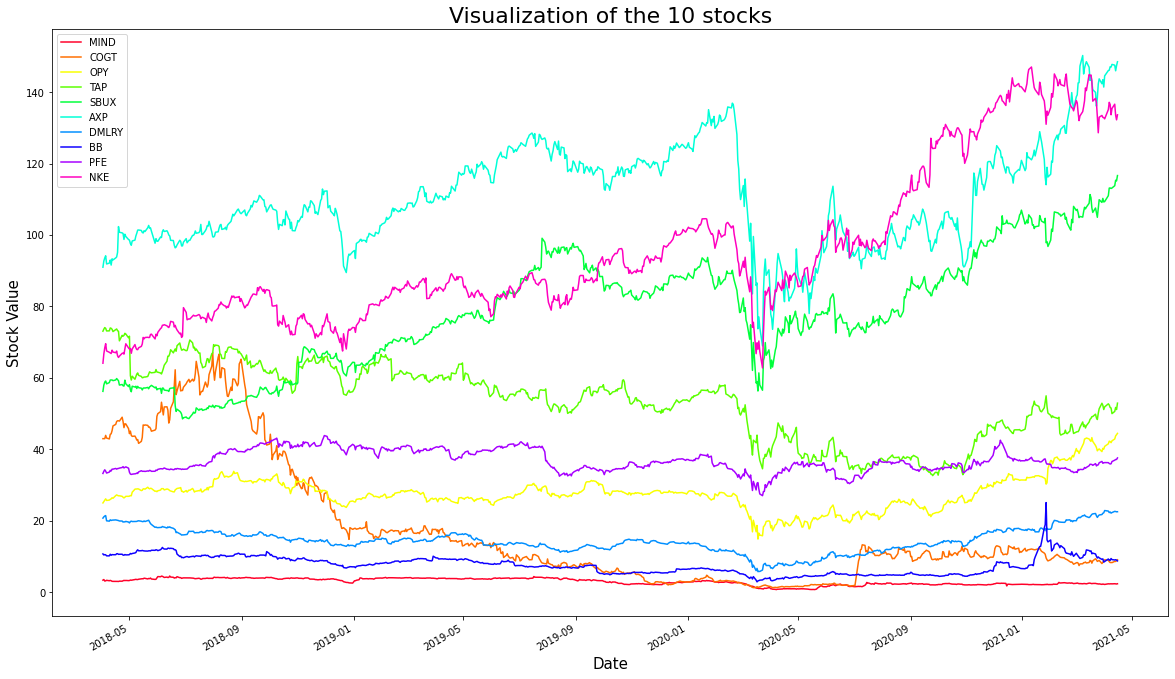

In [6]:
mydata.plot(figsize = (20, 12), colormap="gist_rainbow") #Plot the dataframe
plt.title("Visualization of the 10 stocks", size=22) #Set the title of the plot
plt.xlabel("Date", size=15) #Set the x label
plt.ylabel("Stock Value", size=15) #Set the y label
plt.show() #Show the plot

### **Normalization to 100**

$$
\frac {P_t}{P_0} * 100
$$

In [7]:
mydata.iloc[0].sort_values()

MIND      3.380000
BB       10.720000
DMLRY    20.750000
OPY      25.000000
PFE      33.254269
COGT     43.000000
SBUX     56.240002
NKE      64.120003
TAP      73.089996
AXP      91.000000
Name: 2018-04-02 00:00:00, dtype: float64

### **Visualization of the Dataframe after Normalization**

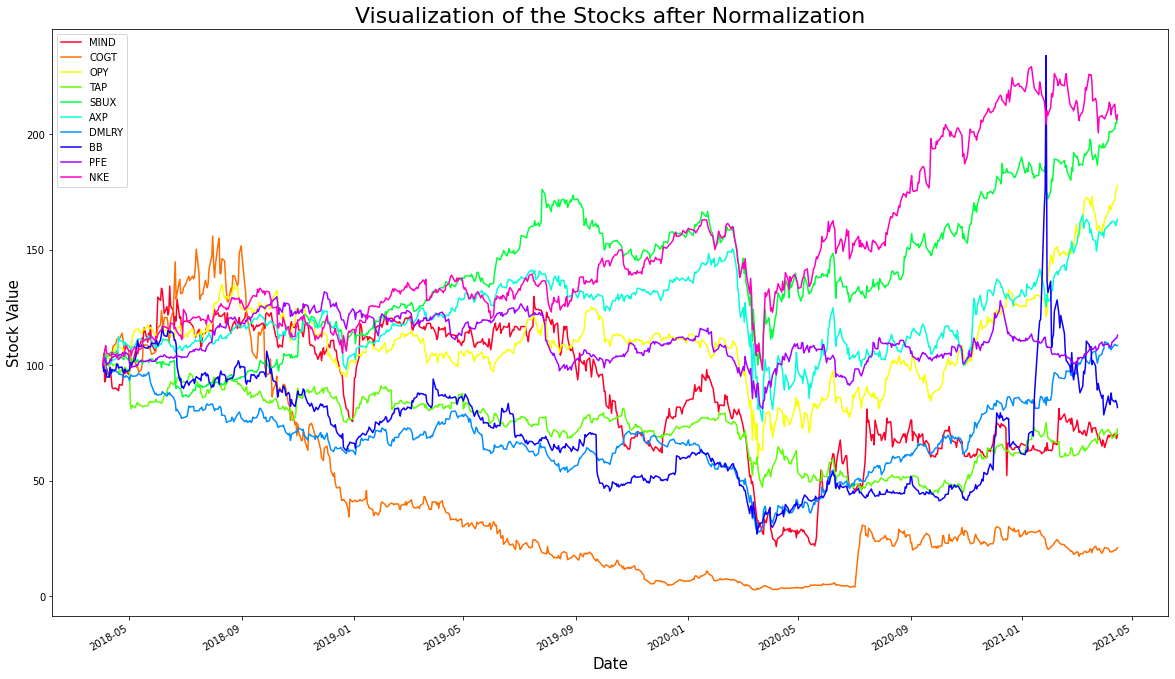

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (20, 12), colormap='gist_rainbow') #Plot the dataframe
plt.title("Visualization of the Stocks after Normalization", size=22) #Set the title 
plt.xlabel("Date", size=15) #Set the x label 
plt.ylabel("Stock Value", size=15) #Set the y label
plt.show() #Show the plot

### **Calculate the Return before changes to the portfolio**

In [9]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,MIND,COGT,OPY,TAP,SBUX,AXP,DMLRY,BB,PFE,NKE
Date,,,,,,,,,,
2018-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-03,0.050296,0.000000,0.016000,0.007525,0.031294,0.019121,0.016867,-0.026119,0.017974,0.040237
2018-04-04,-0.115493,0.000000,0.013780,0.006247,0.014310,0.009058,0.010900,0.008621,0.012612,0.025787
2018-04-05,0.015924,0.021395,0.015534,-0.002969,0.005269,0.006625,0.006095,-0.005698,-0.011071,0.017100
2018-04-06,0.047022,-0.017304,-0.017208,-0.009745,-0.013527,-0.024310,-0.068034,-0.026743,-0.015673,-0.029314


### **Calculate the Return after changes to the portfolio**

In [10]:
change=mydata.pct_change().apply(lambda x: np.log(1+x))
change.head()

,MIND,COGT,OPY,TAP,SBUX,AXP,DMLRY,BB,PFE,NKE
Date,,,,,,,,,,
2018-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-03,0.049072,0.000000,0.015873,0.007497,0.030815,0.018940,0.016727,-0.026467,0.017815,0.039449
2018-04-04,-0.122725,0.000000,0.013685,0.006227,0.014209,0.009017,0.010841,0.008584,0.012533,0.025460
2018-04-05,0.015798,0.021170,0.015415,-0.002973,0.005256,0.006603,0.006076,-0.005714,-0.011133,0.016956
2018-04-06,0.045950,-0.017456,-0.017358,-0.009793,-0.013620,-0.024610,-0.070458,-0.027107,-0.015797,-0.029753


### **Variance**

**<font size="4" color="brown">Variance in prices is an indicator of how volatile the investment will be.</font>**

In [11]:
variance_df = change.var()
variance_df

MIND     0.002465
COGT     0.006565
OPY      0.000711
TAP      0.000521
SBUX     0.000404
AXP      0.000640
DMLRY    0.000764
BB       0.002006
PFE      0.000258
NKE      0.000394
dtype: float64

### **Volatility**

**<font size="4" color="brown">Volatility is the square root of the variance. This results in the volatility of one day. To obtain the annual volatility, we will use total number of trading days as 250. <br> Source: [Warrior Trading](#https://www.warriortrading.com/how-many-trading-days-in-a-year/)</font>**

In [12]:
volatility_df = np.sqrt(variance_df * 250)
volatility_df

MIND     0.784962
COGT     1.281158
OPY      0.421605
TAP      0.360750
SBUX     0.317699
AXP      0.400125
DMLRY    0.437093
BB       0.708132
PFE      0.254166
NKE      0.313917
dtype: float64

### **Visualization of Volatility of Stocks**

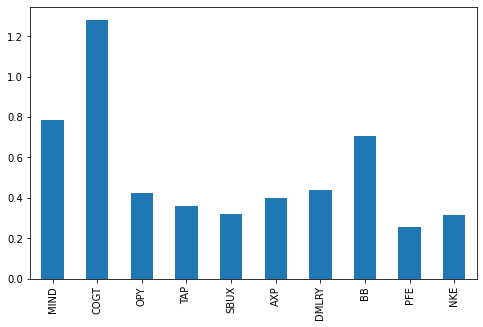

In [13]:
plt.figure(figsize=(8,5))
mydata.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()

### **Covariance**

**<font size="4" color="brown">Covariance measures how an asset varies with respect to other asset. A positive covariance means that the returns of two assets are directly proportional to each other while negative covariance implies that the two assets vary with respect to each other in inverse direction.</font>**

In [14]:
covariance_df = np.round(mydata.pct_change().apply(lambda x: np.log(1+x)).cov(),4)
covariance_df

,MIND,COGT,OPY,TAP,SBUX,AXP,DMLRY,BB,PFE,NKE
MIND,0.0025,0.0003,0.0002,0.0001,0.0002,0.0002,0.0002,0.0003,0.0001,0.0002
COGT,0.0003,0.0066,0.0003,0.0000,0.0002,0.0002,0.0003,0.0003,0.0001,0.0002
OPY,0.0002,0.0003,0.0007,0.0003,0.0003,0.0005,0.0004,0.0003,0.0002,0.0003
TAP,0.0001,0.0000,0.0003,0.0005,0.0002,0.0003,0.0003,0.0002,0.0001,0.0002
SBUX,0.0002,0.0002,0.0003,0.0002,0.0004,0.0003,0.0003,0.0002,0.0001,0.0002
AXP,0.0002,0.0002,0.0005,0.0003,0.0003,0.0006,0.0005,0.0003,0.0002,0.0003
DMLRY,0.0002,0.0003,0.0004,0.0003,0.0003,0.0005,0.0008,0.0003,0.0002,0.0003
BB,0.0003,0.0003,0.0003,0.0002,0.0002,0.0003,0.0003,0.0020,0.0002,0.0002
PFE,0.0001,0.0001,0.0002,0.0001,0.0001,0.0002,0.0002,0.0002,0.0003,0.0001
NKE,0.0002,0.0002,0.0003,0.0002,0.0002,0.0003,0.0003,0.0002,0.0001,0.0004


### **Visualization of Covariance of Stocks**

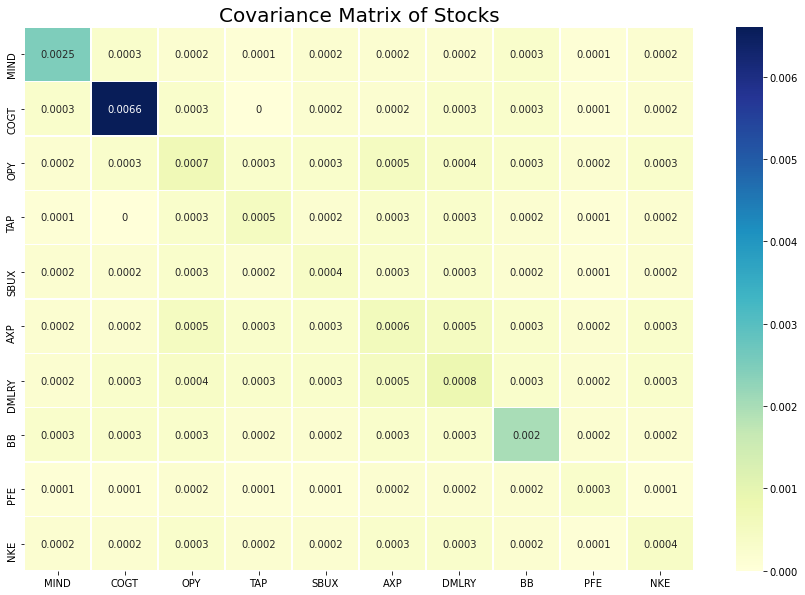

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(covariance_df, annot=True, cmap='YlGnBu', linewidth=0.5)
plt.title("Covariance Matrix of Stocks", size=20)
plt.show()

**<font size="4" color="brown">The above plot illustrates the covariance of stocks with respect to each other. In the next step, we will evaluate the correlation of stocks to each other and will understand the impact of the correlation for our portfolio.</font>**

### **Correlation**

**<font size="4" color="brown">Correlation is a statistic that measures the degree to which two securities are related to each other. Correlation coefficient varies between -1 and 1. <br>a) If correlation of two assets is negative, this implies that if one increases, the other decreases and vice-verse.<br>b) If correlation of two assets is positive, the positive change in one increases the other positively and vice-verse.<br>c) Correlation of 0 means there is no relation between the two assets.</font>**

In [16]:
correlation_df = np.round(mydata.pct_change().apply(lambda x: np.log(1+x)).corr(), 4)
correlation_df

,MIND,COGT,OPY,TAP,SBUX,AXP,DMLRY,BB,PFE,NKE
MIND,1.0000,0.0835,0.1279,0.1127,0.1540,0.1975,0.1519,0.1479,0.1229,0.1967
COGT,0.0835,1.0000,0.1507,0.0255,0.1045,0.0981,0.1539,0.0775,0.0975,0.1083
OPY,0.1279,0.1507,1.0000,0.4201,0.5598,0.6741,0.6065,0.2170,0.3501,0.5125
TAP,0.1127,0.0255,0.4201,1.0000,0.3685,0.5151,0.4207,0.2110,0.3966,0.3365
SBUX,0.1540,0.1045,0.5598,0.3685,1.0000,0.6623,0.5758,0.2668,0.4452,0.5932
AXP,0.1975,0.0981,0.6741,0.5151,0.6623,1.0000,0.6752,0.2521,0.4339,0.5655
DMLRY,0.1519,0.1539,0.6065,0.4207,0.5758,0.6752,1.0000,0.2627,0.3980,0.5672
BB,0.1479,0.0775,0.2170,0.2110,0.2668,0.2521,0.2627,1.0000,0.2222,0.2062
PFE,0.1229,0.0975,0.3501,0.3966,0.4452,0.4339,0.3980,0.2222,1.0000,0.3941
NKE,0.1967,0.1083,0.5125,0.3365,0.5932,0.5655,0.5672,0.2062,0.3941,1.0000


### **Visualization of Correlation of Stocks**

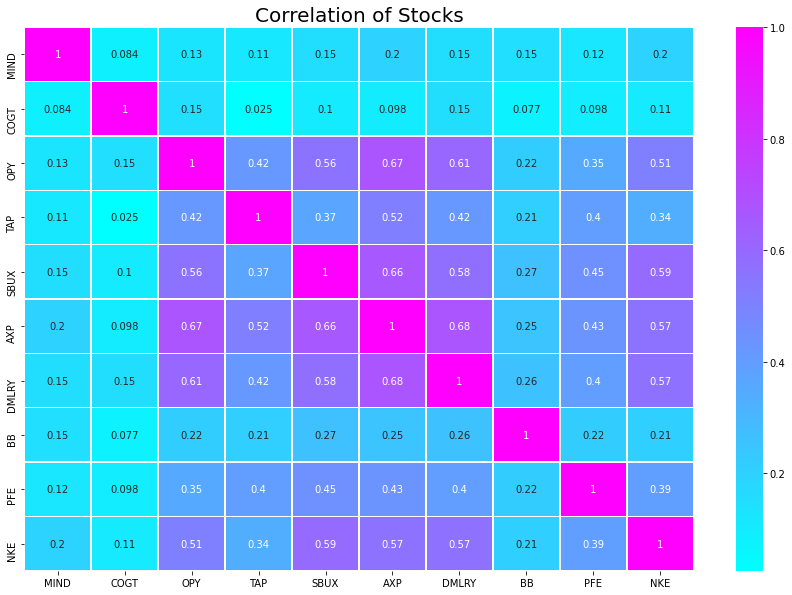

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_df, annot=True, cmap='cool', linewidth=0.5)
plt.title("Correlation of Stocks", size=20)
plt.show()

**<font size="4" color="brown">The general rule of portfolio diversification is to select the stocks which are weakly related to each other or have no correlation. This helps to minimize the risk associated with the portfolio.</font>**

**<font size="4" color="brown">On a closer look, we can observe that American Express, Daimler AG and Nike are strongly related to other stocks. We can handle this by replacing American Express with Air Canada.<br> Secondly, we can replace Daimler AG stock with Costco Wholesale Corporation.<br>Thirdly, we can replace Nike with Under Armour.</font>**

**<font size="4" color="brown">Keeping all other stocks same, we are replacing <br>(i) American Express with Air Canada (AC.TO), <br>(ii) Daimler AG with Costco Wholesale Corporation (COST).<br>(iii) Nike with Under Armour (UA).<br> Thus, our portfolio becomes:</font>**

**_MIND: MIND Technology, Inc. - The company, based in Huntsville, Texas, markets geophysical and other equipment to seismic data acquisition contractors conducting surveys on land, marsh, and marine areas, both shallow and deep water_**   

**_COGT: Cogent Biosciences - A Biotechnology Company_**   

**_OPY: Oppenheimer Holdings - American Multinational Independent Investment Bank_**   

**_TAP: Molson Coors Beverage Company - A multinational drink and brewing company headquartered in Chicago in the United States_**   

**_SBUX: Starbucks Corporation - An American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington_**  

**<font color="green">_AC.TO: Air Canada - The flag carrier and the largest airline of Canada by fleet size and passengers carried_</font>**   

**<font color="green">_COST: Costco Wholesale Corporation - An American multinational corporation which operates a chain of membership-only big-box retail stores_</font>**  

**_BB: BlackBerry Limited - A Canadian multinational company specialising in enterprise software and the Internet of things_**  

**_PFE: Pfizer Inc - An American multinational pharmaceutical corporation_**  

**<font color="green">_UA: Under Armour Inc - An American sports equipment company that manufactures footwear, sports and casual apparel._</font>**   

In [18]:
#Load the data
tickers_1 = ['MIND', 'COGT', 'OPY', 'TAP', 'SBUX', 'AC.TO', 'COST', 'BB', 'PFE', 'UA'] #load the 10 tickers for portfolio
mydata_1 = pd.DataFrame() #Initiate the dataframe
for t in tickers_1:
    mydata_1[t] = wb.DataReader(t, data_source='yahoo', start='2018-04-01')['Close'] #Load the ticker data into dataframe

### **Evaluation of Returns of Portfolio**

In [19]:
returns_1 = (mydata_1 / mydata_1.shift(1)) - 1
returns_1.head()

,MIND,COGT,OPY,TAP,SBUX,AC.TO,COST,BB,PFE,UA
Date,,,,,,,,,,
2018-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-03,0.050296,0.000000,0.016000,0.007525,0.031294,-0.001140,-0.000766,-0.026119,0.017974,0.052895
2018-04-04,-0.115493,0.000000,0.013780,0.006247,0.014310,0.002664,0.015936,0.008621,0.012612,0.061779
2018-04-05,0.015924,0.021395,0.015534,-0.002969,0.005269,-0.017837,0.003935,-0.005698,-0.011071,-0.028772
2018-04-06,0.047022,-0.017304,-0.017208,-0.009745,-0.013527,-0.002705,-0.012295,-0.026743,-0.015673,-0.028966


### **Correlation of Stocks**

In [20]:
corr_df = np.round(mydata_1.pct_change().apply(lambda x: np.log(1+x)).corr(), 4)
corr_df

,MIND,COGT,OPY,TAP,SBUX,AC.TO,COST,BB,PFE,UA
MIND,1.0000,0.0835,0.1279,0.1127,0.1540,0.2171,0.0315,0.1479,0.1229,0.1416
COGT,0.0835,1.0000,0.1507,0.0255,0.1045,0.0503,0.0897,0.0775,0.0975,0.0947
OPY,0.1279,0.1507,1.0000,0.4201,0.5598,0.4756,0.2990,0.2170,0.3501,0.4969
TAP,0.1127,0.0255,0.4201,1.0000,0.3685,0.3351,0.2724,0.2110,0.3966,0.3681
SBUX,0.1540,0.1045,0.5598,0.3685,1.0000,0.4867,0.4312,0.2668,0.4452,0.4516
AC.TO,0.2171,0.0503,0.4756,0.3351,0.4867,1.0000,0.1020,0.2255,0.3098,0.4070
COST,0.0315,0.0897,0.2990,0.2724,0.4312,0.1020,1.0000,0.1451,0.4162,0.2604
BB,0.1479,0.0775,0.2170,0.2110,0.2668,0.2255,0.1451,1.0000,0.2222,0.1738
PFE,0.1229,0.0975,0.3501,0.3966,0.4452,0.3098,0.4162,0.2222,1.0000,0.2732
UA,0.1416,0.0947,0.4969,0.3681,0.4516,0.4070,0.2604,0.1738,0.2732,1.0000


### **Visualization of Correlation Matrix**

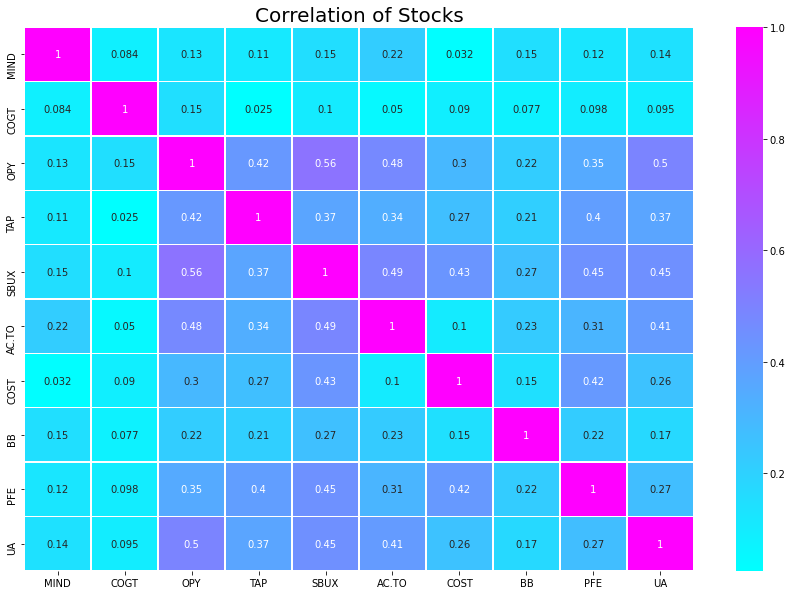

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True, cmap='cool', linewidth=0.5)
plt.title("Correlation of Stocks", size=20)
plt.show()

**<font size="4" color="brown">In the next step, we will calculate the expected returns for this portfolio.</font>**

### **Visualization of the Stocks**

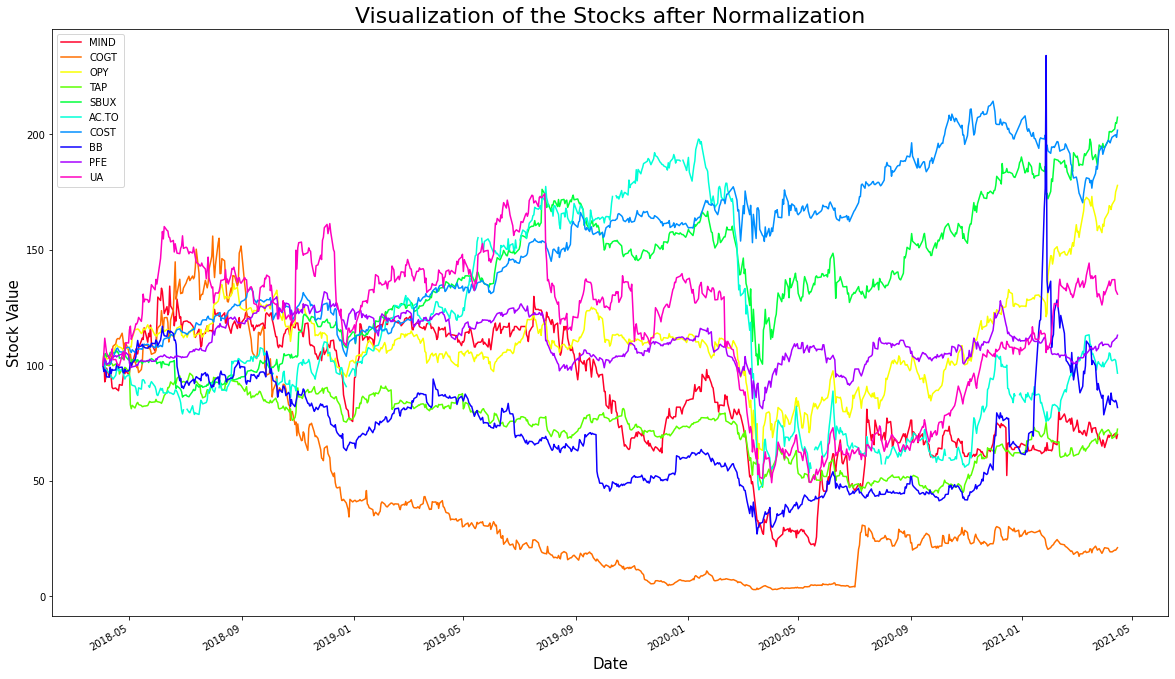

In [22]:
(mydata_1 / mydata_1.iloc[0] * 100).plot(figsize = (20, 12), colormap='gist_rainbow') #Plot the dataframe
plt.title("Visualization of the Stocks after Normalization", size=22) #Set the title 
plt.xlabel("Date", size=15) #Set the x label 
plt.ylabel("Stock Value", size=15) #Set the y label
plt.show() #Show the plot

### **Evaluation of Expected Returns**

**<font size="4" color="brown">Expected returns of an asset are the average of percentage change in its stock prices. For expected returns, we assign the weights to the assets.</font>**

### **Assigning Equal Weights to the Portfolio**

In [23]:
weights = np.array([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])

In [24]:
annual_returns = returns_1.mean() * 250
annual_returns

MIND     0.199232
COGT     0.661503
OPY      0.276676
TAP     -0.040826
SBUX     0.288903
AC.TO    0.084420
COST     0.255195
BB       0.178314
PFE      0.072361
UA       0.225982
dtype: float64

In [25]:
np.dot(annual_returns, weights)

0.22017615966053547

In [26]:
pfolio_1 = np.round((np.dot(annual_returns, weights))*100, 3)
print(f"{pfolio_1} %")

22.018 %


**<font size="4" color="brown">_This indicates that if the investor distributes the investment on equal proportion, then they would fetch 22.018% of return on their portfolio._</font>**

### **Assigning Unequal Weights to the Portfolio - Weights sum up to 1**

In [27]:
weights_1 = np.array([0.10, 0.20, 0.075, 0.10, 0.20, 0.10, 0.025, 0.075, 0.10, 0.025])

In [28]:
pfolio_2 = np.round((np.dot(annual_returns, weights_1))*100, 3)
print (f'pfolio_2 is {pfolio_2} %')

pfolio_2 is 26.775 %


**<font size="4" color="brown">_This indicates that if the investor distributes the investment on unequal proportion with conservation approach, then they would fetch 26.775% of return on their portfolio._</font>**

### **Assigning Unequal Weights to the Portfolio (to get high return) - Weights sum up to 1**

In [29]:
weights_2 = np.array([0.00125, 0.65, 0.00125, 0.0225, 0.05, 0.025, 0.025, 0.015, 0.005, 0.205])


In [30]:
pfolio_3 = np.round((np.dot(annual_returns, weights_2))*100, 3)
print (f'pfolio_3 is {pfolio_3} %')

pfolio_3 is 50.195 %


**<font size="4" color="brown">_This indicates that if the investor distributes the investment on unequal proportion with aggressive approach, then they would fetch 50.195% of return on their portfolio._</font>**

## **Portfolio Optimization with Monte Carlo Simulation**

**<font size="4" color="brown">_According to [Investopedia](#https://www.investopedia.com/terms/m/montecarlosimulation.asp),<br>"<u>Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.</u>"_</font>**

**<font size="4" color="brown">In this part, we will be performing Monte Carlo Simulation on our portfolio to assess the expected return and the risk associated with all the simulations. We are creating 1 million simulations for our portfolio.</font>**

### **Load the dataset**

In [31]:
#Load the data
tickers_1 = ['MIND', 'COGT', 'OPY', 'TAP', 'SBUX', 'AC.TO', 'COST', 'BB', 'PFE', 'UA'] #load the 10 tickers for portfolio
mydata_1 = pd.DataFrame() #Initiate the dataframe
for t in tickers_1:
    mydata_1[t] = wb.DataReader(t, data_source='yahoo', start='2018-04-01')['Close'] #Load the ticker data into dataframe

### **Evaluate Annual Returns on Portfolio**

In [32]:
daily_returns = mydata_1.pct_change()
annual_returns = daily_returns.mean()*250
annual_returns

MIND     0.199232
COGT     0.661503
OPY      0.276676
TAP     -0.040826
SBUX     0.288903
AC.TO    0.138735
COST     0.255195
BB       0.178314
PFE      0.072361
UA       0.225982
dtype: float64

### **Calculate Covariance of the portfolio**

In [33]:
covariance = np.round(daily_returns.cov()*250,4) #Evaluation of Covariance
covariance

,MIND,COGT,OPY,TAP,SBUX,AC.TO,COST,BB,PFE,UA
MIND,0.6740,0.1243,0.0388,0.0304,0.0342,0.0903,0.0041,0.0749,0.0228,0.0591
COGT,0.1243,5.9007,0.1071,0.0175,0.0570,0.0219,0.0400,0.0923,0.0310,0.0887
OPY,0.0388,0.1071,0.1757,0.0634,0.0745,0.1036,0.0285,0.0624,0.0374,0.1077
TAP,0.0304,0.0175,0.0634,0.1278,0.0422,0.0663,0.0223,0.0518,0.0365,0.0695
SBUX,0.0342,0.0570,0.0745,0.0422,0.1007,0.0817,0.0307,0.0568,0.0355,0.0746
AC.TO,0.0903,0.0219,0.1036,0.0663,0.0817,0.2989,0.0104,0.0815,0.0424,0.1134
COST,0.0041,0.0400,0.0285,0.0223,0.0307,0.0104,0.0515,0.0222,0.0241,0.0308
BB,0.0749,0.0923,0.0624,0.0518,0.0568,0.0815,0.0222,0.4730,0.0384,0.0629
PFE,0.0228,0.0310,0.0374,0.0365,0.0355,0.0424,0.0241,0.0384,0.0644,0.0358
UA,0.0591,0.0887,0.1077,0.0695,0.0746,0.1134,0.0308,0.0629,0.0358,0.2737


### **Visualization of Covariance**

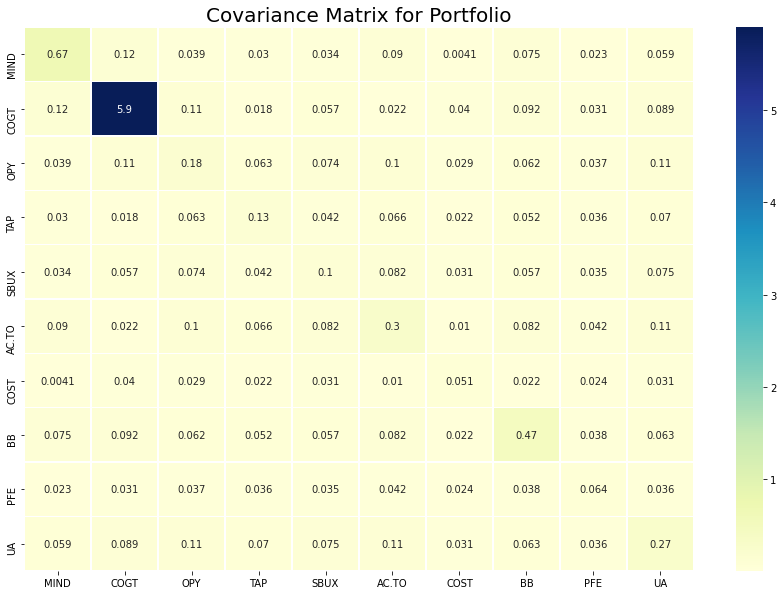

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(covariance, annot=True, cmap='YlGnBu', linewidth=0.5)
plt.title("Covariance Matrix for Portfolio", size=20)
plt.show()

### **Instantiate the Lists for Simulations**

In [35]:
port_returns = []
port_risk = []
stock_weight = []

n = 1000000 #Number of Simulations for Portfolio

### **Run the simulations**

In [36]:
for port in range(n):
    weights = np.random.random(len(tickers_1))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    risk = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    
    port_returns.append(returns)
    port_risk.append(risk)    
    stock_weight.append(weights)
    
portfolios = {'Returns':port_returns, 'Risk':port_risk}
for indices, t in enumerate(tickers_1):
    portfolios[t+'_Weight'] = [weight[indices] for weight in stock_weight]
    
df = pd.DataFrame(portfolios)

df.head()

,Returns,Risk,MIND_Weight,COGT_Weight,OPY_Weight,TAP_Weight,SBUX_Weight,AC.TO_Weight,COST_Weight,BB_Weight,PFE_Weight,UA_Weight
0,0.221565,0.406499,0.093687,0.122861,0.053683,0.112026,0.084795,0.114866,0.045047,0.123526,0.123637,0.125873
1,0.198333,0.322359,0.165993,0.074243,0.156166,0.159593,0.022666,0.011328,0.127586,0.011569,0.159432,0.111422
2,0.251109,0.440091,0.095201,0.146623,0.152256,0.030288,0.002865,0.162293,0.157002,0.058002,0.154044,0.041426
3,0.202553,0.307996,0.062368,0.047398,0.078342,0.045086,0.062617,0.116201,0.111659,0.204394,0.141038,0.130896
4,0.244273,0.402173,0.104197,0.121628,0.099189,0.074990,0.116731,0.068945,0.084330,0.124494,0.096159,0.109337


### **Creation of Data to plot Efficient Frontier**

In [37]:
data = pd.concat([df['Returns'],df['Risk']], axis=1)
start = data["Risk"].min()
end = data["Risk"].max()

step = start*(1/1000)

X=[]
Y=[]
for i in range(1000):
    y=data['Returns'][data['Risk']>=start+(i*step)][data['Risk']<=start+(i+1)*step].max()
    x=(start+(i*step) + start+(i+1)*step)/2
    X.append(x)
    Y.append(y)

### **Visualization of Efficient Frontier**

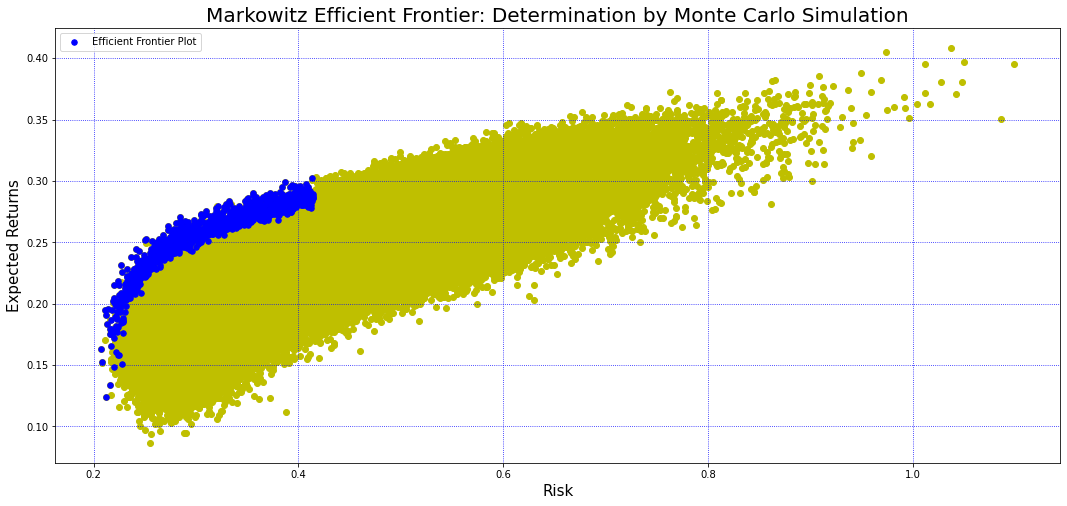

In [38]:
fig = plt.figure(figsize=(18,8))
ax = plt.subplot2grid((4,4),(0,0), rowspan=4, colspan=4, facecolor='w')
ax.scatter(df['Risk'], df['Returns'], color="y", label='')
ax.scatter(X, Y, color='blue', s=30, label="Efficient Frontier Plot")
plt.xlabel('Risk', size=15)
plt.ylabel('Expected Returns', size=15)
plt.legend()
plt.title("Markowitz Efficient Frontier: Determination by Monte Carlo Simulation", size=20)
ax.grid(True, color="b", linestyle=":")
plt.show()

**<font size="4" color="brown">Using 1000000 random simulations for portfolio, we have observed the above results. As per the plot, the portfolios that have risk less than or equal to 40% will generate expected returns in the range of 10% to 30%. In other words, out of 1 million simulations of our portfolio, we have found out that portfolios that will fetch 10% to 30% of expected returns will be prone to less than 40% of the risk.</font>**

## **Conclusion**

**<font size="4" color="brown">We have optimized our portfolio of 10 stocks for our investor and built him a portfolio that would fetch him expected return with minimum risk.</font>**   
**<font size="4" color="brown">Using Monte Carlo Simulations, we have evaluated the chances of risk associated to different versions of our portfolio by generating 1 million simulations.</font>**

## **References**

- https://towardsdatascience.com/automating-portfolio-optimization-using-python-9f344b9380b9
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot2grid.html
- https://corporatefinanceinstitute.com/resources/knowledge/finance/portfolio-variance/
- https://ca.finance.yahoo.com/lookup
- https://datatofish.com/covariance-matrix-python/
- https://seaborn.pydata.org/generated/seaborn.heatmap.html